In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_black_hole_lightcurve(fs, fc, fm, qpo_amplitude, duration, 
                                   noise_mean=0, noise_std=0.5, 
                                   include_qpo=True, modulation_index=0.5):
    """
    Simulate a black hole light curve with stochastic noise and an amplitude-modulated QPO signal.
    
    Parameters:
        fs : int
            Sampling frequency (Hz)
        fc : float
            Carrier frequency (Hz) for QPO
        fm : float
            Modulating frequency (Hz) for QPO
        qpo_amplitude : float
            Amplitude of the carrier signal (QPO)
        duration : float
            Duration of lightcurve (seconds)
        noise_mean : float
            Mean of the Gaussian noise
        noise_std : float
            Standard deviation of the Gaussian noise
        include_qpo : bool
            Whether to include the QPO signal
        modulation_index : float
            Modulation index for AM signal
            
    Returns:
        t : np.ndarray
            Time array
        flux : np.ndarray
            Normalized flux array
    """
    # Time array
    t = np.arange(0, duration, 1/fs)

    # White noise
    white_noise = np.random.normal(noise_mean, noise_std, size=len(t))
    white_noise = np.exp(white_noise)

    if include_qpo:
        # Modulating signal
        msg = qpo_amplitude * np.cos(2 * np.pi * fm * t)

        # Carrier signal
        carrier = qpo_amplitude * np.cos(2 * np.pi * fc * t)

        # AM QPO signal
        qpo = carrier * (1 + modulation_index * msg / qpo_amplitude)
    else:
        qpo = 0

    # Combine noise and QPO signal
    flux = white_noise + qpo

    # Normalize
    flux = (flux - np.mean(flux)) / np.std(flux)

    return t, flux


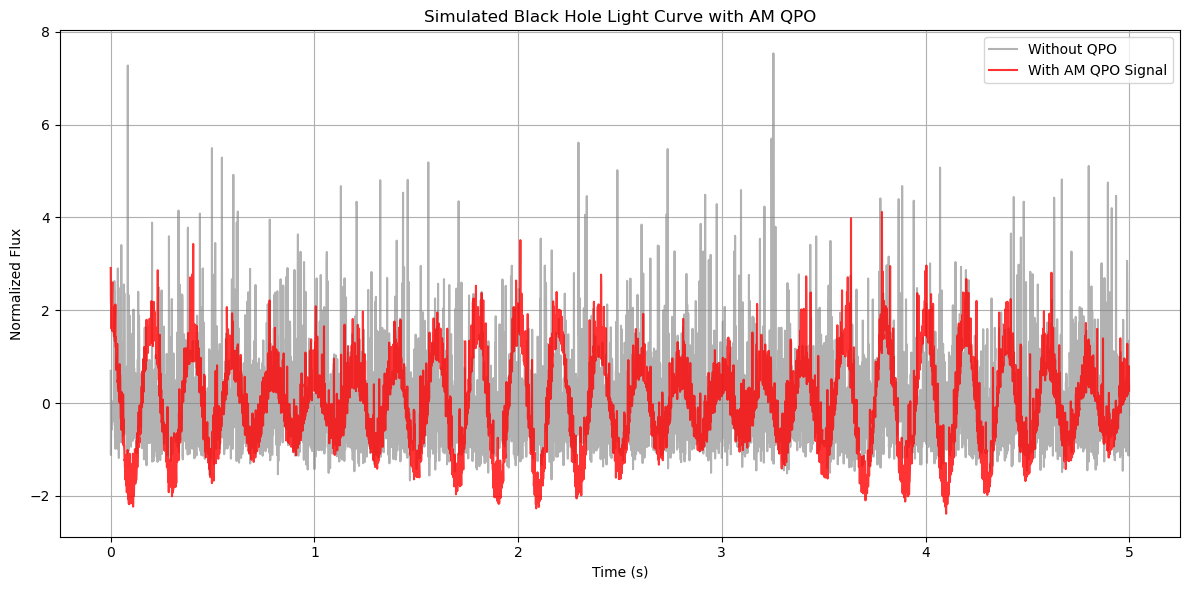

In [4]:
# Simulate with and without QPO
fs = 1000  # Sample frequency (smaller for clarity in plots)
fc = 5     # Carrier (QPO) frequency
fm = 0.5   # Modulating frequency (e.g., precession)
duration = 5 # seconds

t, flux_with_qpo = simulate_black_hole_lightcurve(fs, fc, fm, qpo_amplitude=2.0, duration=duration, include_qpo=True)
_, flux_without_qpo = simulate_black_hole_lightcurve(fs, fc, fm, qpo_amplitude=2.0, duration=duration, include_qpo=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, flux_without_qpo, color='gray', alpha=0.6, label="Without QPO")
plt.plot(t, flux_with_qpo, color='red', alpha=0.8, label="With AM QPO Signal")
plt.xlabel("Time (s)")
plt.ylabel("Normalized Flux")
plt.title("Simulated Black Hole Light Curve with AM QPO")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# --- Parameters ---
fs = 1000
fc = 5
fm = 0.5
amplitude = 2.0
duration = 10
n_samples = 1000
n_points = int(fs * duration)

# --- Storage for dataset ---
data_rows = []

for _ in range(n_samples):
    flux_qpo = simulate_black_hole_lightcurve(fs, fc, fm, amplitude, duration, include_qpo=True)
    flux_non_qpo = simulate_black_hole_lightcurve(fs, fc, fm, amplitude, duration, include_qpo=False)

    # Append QPO with label 1
    data_rows.append(np.append(flux_qpo, 1))
    # Append Non-QPO with label 0
    data_rows.append(np.append(flux_non_qpo, 0))

# Convert to DataFrame
columns = [f'flux_{i}' for i in range(n_points)] + ['label']
df = pd.DataFrame(data_rows, columns=columns)

# Save to CSV
df.to_csv("black_hole_qpo_dataset.csv", index=False)
print("✅ Dataset saved as 'black_hole_qpo_dataset.csv'")


✅ Dataset saved as 'black_hole_qpo_dataset.csv'


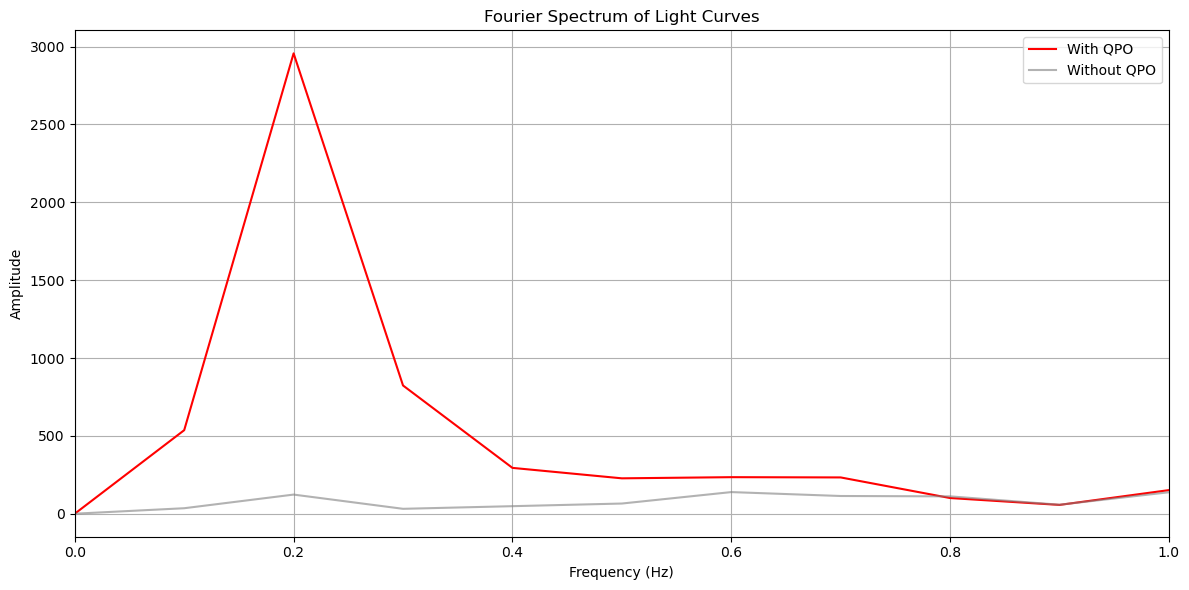

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate one QPO and one non-QPO signal
fs = 1000  # sampling frequency
duration = 10  # seconds
fc = 0.2  # QPO frequency
fm = 0.05  # modulation frequency
amplitude = 0.4

flux_qpo = simulate_black_hole_lightcurve(fs, fc, fm, amplitude, duration, include_qpo=True)
flux_non_qpo = simulate_black_hole_lightcurve(fs, fc, fm, amplitude, duration, include_qpo=False)

# Perform FFT
n = len(flux_qpo)
freqs = np.fft.rfftfreq(n, 1/fs)
fft_qpo = np.abs(np.fft.rfft(flux_qpo))
fft_non_qpo = np.abs(np.fft.rfft(flux_non_qpo))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(freqs, fft_qpo, label="With QPO", color='red')
plt.plot(freqs, fft_non_qpo, label="Without QPO", color='gray', alpha=0.6)
plt.xlim(0, 1)  # focus on QPO frequency range
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Fourier Spectrum of Light Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


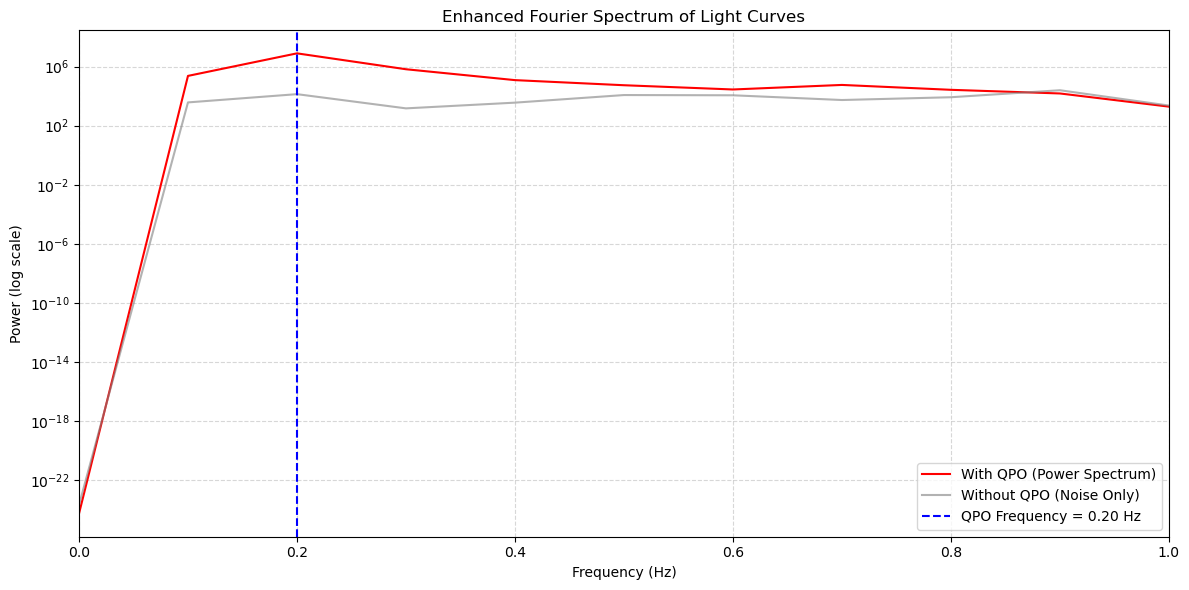

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- Simulate a QPO and non-QPO light curve ---
fs = 1000        # Sampling frequency (Hz)
duration = 10    # seconds
fc = 0.2         # QPO (carrier) frequency
fm = 0.05        # Modulation frequency
amplitude = 0.4  # Constant amplitude

# Generate signals
flux_qpo = simulate_black_hole_lightcurve(fs, fc, fm, amplitude, duration, include_qpo=True)
flux_non_qpo = simulate_black_hole_lightcurve(fs, fc, fm, amplitude, duration, include_qpo=False)

# --- Fourier Transform ---
n = len(flux_qpo)
freqs = np.fft.rfftfreq(n, 1/fs)
psd_qpo = np.abs(np.fft.rfft(flux_qpo))**2
psd_non_qpo = np.abs(np.fft.rfft(flux_non_qpo))**2

# --- Plotting ---
plt.figure(figsize=(12, 6))

plt.plot(freqs, psd_qpo, color='red', label="With QPO (Power Spectrum)")
plt.plot(freqs, psd_non_qpo, color='gray', alpha=0.6, label="Without QPO (Noise Only)")

# Mark the actual QPO frequency
plt.axvline(fc, color='blue', linestyle='--', linewidth=1.5, label=f"QPO Frequency = {fc:.2f} Hz")

# Enhancements
plt.xlim(0, 1.0)                 # Zoom into QPO freq range
plt.yscale('log')               # Log scale to show contrast better
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (log scale)")
plt.title("Enhanced Fourier Spectrum of Light Curves")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
